# Salary Prediction using Linear Regression

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

Text(0.5, 1.0, 'Prediction Salary')

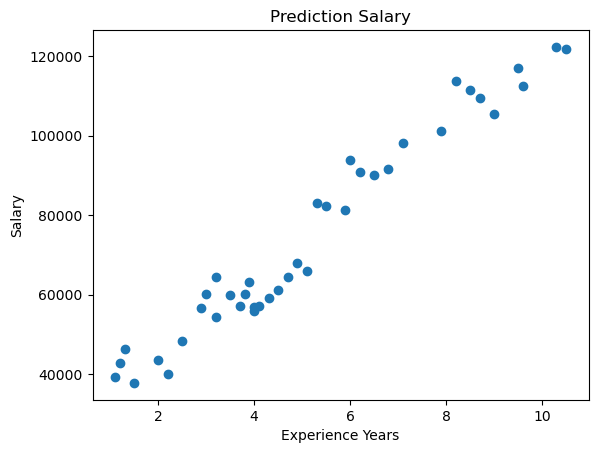

In [3]:
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Prediction Salary')

In [4]:
x=df[['Experience Years']]
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


# Linear Regression

In [5]:
y=df[['Salary']]
y.head()

,Salary
0,39343
1,42774
2,46205
3,37731
4,43525


In [6]:
x.mean()

Experience Years    5.1525
dtype: float64

In [7]:
y.mean()

Salary    74743.625
dtype: float64

Text(0.5, 1.0, 'Prediction Salary')

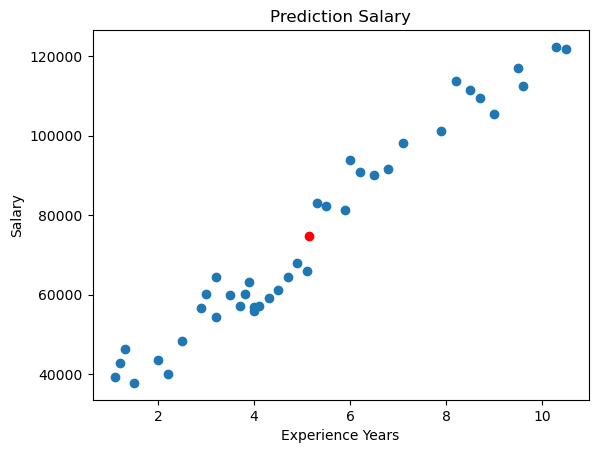

In [8]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Experience Years'],df['Salary'])
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Prediction Salary')

In [9]:
# lineae regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [11]:
reg.fit(x,y) # got the m and b

LinearRegression()

In [12]:
reg.coef_

array([[9523.65050742]])

In [13]:
reg.intercept_

array([25673.01576053])

In [15]:
reg.predict([[2]])

C:\Users\power\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[44720.31677537]])

In [18]:
df["Predict_Salary"]=reg.predict(x)
df.head(len(df))

,Experience Years,Salary,Predict_Salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775
5,2.2,39891,46625.046877
6,2.5,48266,49482.142029
7,2.9,56642,53291.602232
8,3.0,60150,54243.967283
9,3.2,54445,56148.697384


Text(0.5, 1.0, 'Prediction Salary')

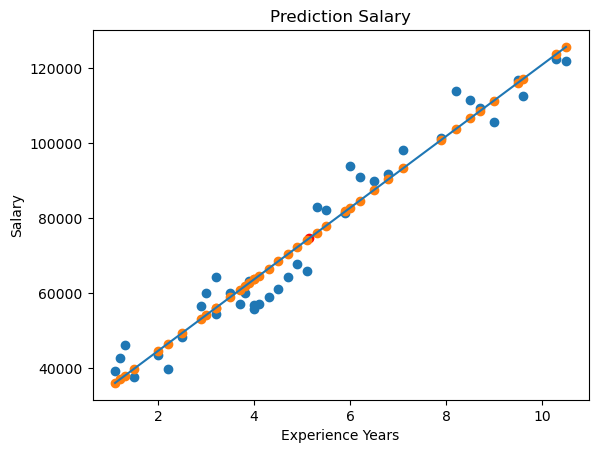

In [20]:
plt.plot(x,reg.predict(x))
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(df['Experience Years'],df['Salary'])
plt.scatter(df['Experience Years'],reg.predict(x))

plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Prediction Salary')

# Cost & Lose

In [24]:
# loss or residual
df["Loss"]=df["Salary"]-df["Predict_Salary"]
df.head()

,Experience Years,Salary,Predict_Salary,Loss
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775


In [25]:
#cost(total) of linear functin is MAE or MSE(more appropriate)
# mse and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
mse=mean_squared_error(df['Salary'],df['Predict_Salary']) # first actual then predicted
mse

28960383.6537762

In [27]:
mae=mean_absolute_error(df['Salary'],df['Predict_Salary']) # first actual then predicted
mae

4516.281792544623

In [28]:
abs(df["Loss"])

0      3193.968681
1      5672.603631
2      8151.238580
3      2227.491522
4      1195.316775
5      6734.046877
6      1216.142029
7      3350.397768
8      5906.032717
9      1703.697384
10     8296.302616
11      994.207464
12     3721.522638
13     1662.887689
14      402.747261
15     7973.617790
16     6810.617790
17     7638.982841
18     7529.712942
19     7418.443044
20     5934.173145
21     4400.903247
22     8214.633348
23     6939.636550
24     4146.906449
25      499.553754
26    11125.081195
27     6280.351093
28     2423.255941
29     1304.160789
30     4982.065637
31      392.145231
32    10045.050079
33     4995.954926
34      902.224825
35     5803.870327
36      821.304419
37     4465.060632
38     1375.615987
39     3799.346088
Name: Loss, dtype: float64

In [29]:
reg.score(x,y) # 35% error VVI

0.9558814451799361

In [30]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.9558814451799361

In [31]:
reg.predict([[10]])

C:\Users\power\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[120909.52083471]])